# MOL (FDM)

In [ ]:
import numpy as np

def dss004(xl, xu, n, u):
    """
    Function dss004 computes the first derivative, ux, of a
    variable u over the spatial domain xl <= x <= xu from classical
    five-point, fourth-order finite difference approximations.

    Parameters:
    xl : float
        Lower boundary value of x (input)
    xu : float
        Upper boundary value of x (input)
    n : int
        Number of grid points in the x domain including the boundary points (input)
    u : numpy array
        One-dimensional array containing the values of u at the n grid points for which the derivative is to be computed (input)

    Returns:
    ux : numpy array
        One-dimensional array containing the numerical values of the derivatives of u at the n grid points (output)
    """

    # Compute the spatial increment
    dx = (xu - xl) / (n - 1)
    r4fdx = 1.0 / (12.0 * dx)
    nm2 = n - 2

    # Initialize the output array
    ux = np.zeros(n)

    # Equation (1) for the left end, point i = 1
    ux[0] = r4fdx * (-25.0 * u[0] + 48.0 * u[1] - 36.0 * u[2] + 16.0 * u[3] - 3.0 * u[4])

    # Equation (2) for the interior point, i = 2
    ux[1] = r4fdx * (-3.0 * u[0] - 10.0 * u[1] + 18.0 * u[2] - 6.0 * u[3] + 1.0 * u[4])

    # Equation (3) for the interior points, i = 3 to n-2
    for i in range(2, nm2):
        ux[i] = r4fdx * (1.0 * u[i-2] - 8.0 * u[i-1] + 0.0 * u[i] + 8.0 * u[i+1] - 1.0 * u[i+2])

    # Equation (4) for the interior point, i = n-1
    ux[n-2] = r4fdx * (-1.0 * u[n-5] + 6.0 * u[n-4] - 18.0 * u[n-3] + 10.0 * u[n-2] + 3.0 * u[n-1])

    # Equation (5) for the right end, point i = n
    ux[n-1] = r4fdx * (3.0 * u[n-5] - 16.0 * u[n-4] + 36.0 * u[n-3] - 48.0 * u[n-2] + 25.0 * u[n-1])

    return ux

In [ ]:
import numpy as np

def dss044(xl, xu, n, u, ux, nl, nu):
    """
    Function dss044 computes a fourth-order approximation of a
    second-order derivative, with or without the normal derivative
    at the boundary.

    Parameters:
    xl : float
        Left value of the spatial independent variable (input)
    xu : float
        Right value of the spatial independent variable (input)
    n : int
        Number of spatial grid points, including the end points (input)
    u : numpy array
        One-dimensional array of the dependent variable to be differentiated (input)
    ux : numpy array
        One-dimensional array of the first derivative of u (input)
    nl : int
        Integer index for the type of boundary condition at x = xl (input):
        1 - Dirichlet boundary condition at x = xl (ux(1) is not used)
        2 - Neumann boundary condition at x = xl (ux(1) is used)
    nu : int
        Integer index for the type of boundary condition at x = xu (input):
        1 - Dirichlet boundary condition at x = xu (ux(n) is not used)
        2 - Neumann boundary condition at x = xu (ux(n) is used)

    Returns:
    uxx : numpy array
        One-dimensional array of the second derivative of u (output)
    """

    # Compute the spatial increment
    dx = (xu - xl) / (n - 1)
    r12dxs = 1.0 / (12.0 * dx**2)

    # Initialize the output array
    uxx = np.zeros(n,dtype=np.float64)

    # uxx at the left boundary
    if nl == 1:
        # Without ux (Dirichlet boundary condition)
        uxx[0] = r12dxs * (
            45.0 * u[0] - 154.0 * u[1] + 214.0 * u[2] - 156.0 * u[3] + 61.0 * u[4] - 10.0 * u[5]
        )
    elif nl == 2:
        # With ux (Neumann boundary condition)
        uxx[0] = r12dxs * (
            (-415.0 / 6.0) * u[0]
            + 96.0 * u[1]
            - 36.0 * u[2]
            + (32.0 / 3.0) * u[3]
            - (3.0 / 2.0) * u[4]
            - 50.0 * ux[0] * dx
        )

    # uxx at the right boundary
    if nu == 1:
        # Without ux (Dirichlet boundary condition)
        uxx[n-1] = r12dxs * (
            45.0 * u[n-1] - 154.0 * u[n-2] + 214.0 * u[n-3] - 156.0 * u[n-4] + 61.0 * u[n-5] - 10.0 * u[n-6]
        )
    elif nu == 2:
        # With ux (Neumann boundary condition)
        uxx[n-1] = r12dxs * (
            (-415.0 / 6.0) * u[n-1]
            + 96.0 * u[n-2]
            - 36.0 * u[n-3]
            + (32.0 / 3.0) * u[n-4]
            - (3.0 / 2.0) * u[n-5]
            + 50.0 * ux[n-1] * dx
        )

    # uxx at the interior grid points
    # i = 2
    uxx[1] = r12dxs * (
        10.0 * u[0] - 15.0 * u[1] - 4.0 * u[2] + 14.0 * u[3] - 6.0 * u[4] + 1.0 * u[5]
    )

    # i = n-1
    uxx[n-2] = r12dxs * (
        10.0 * u[n-1] - 15.0 * u[n-2] - 4.0 * u[n-3] + 14.0 * u[n-4] - 6.0 * u[n-5] + 1.0 * u[n-6]
    )

    # i = 3, 4,..., n-2
    for i in range(2, n - 2):
        uxx[i] = r12dxs * (
            -1.0 * u[i - 2] + 16.0 * u[i - 1] - 30.0 * u[i] + 16.0 * u[i + 1] - 1.0 * u[i + 2]
        )

    return uxx

In [ ]:
import numpy as np

def flu_1(t, u, parms):
    """
    Computes the time derivative vector of the S, V, E, I, R vectors.

    Args:
        t (float): Time variable (not used in computation but required for solver)
        u (numpy array): State vector containing S, V, E, I, R values
        parms (dict): Dictionary of parameters

    Returns:
        numpy array: Time derivative of the state vector
    """
    global ncall

    # Extract parameters from the input dictionary for readability
    beta, betae, betai, betav = parms["beta"], parms["betae"], parms["betai"], parms["betav"]
    alpha, phi, delta, theta, kappa = parms["alpha"], parms["phi"], parms["delta"], parms["theta"], parms["kappa"]
    sigma, gamma, r, d1, d2, d3, d4, d5 = parms["sigma"], parms["gamma"], parms["r"], parms["d1"], parms["d2"], parms["d3"], parms["d4"], parms["d5"]

    # Split the state vector into the five components: S, V, E, I, R
    nx = len(u) // 5  # Number of spatial points
    S, V, E, I, R = np.split(u, 5)  # Split the 1D state vector into five 1D arrays

    # Define spatial domain boundaries and Neumann boundary conditions
    xl, xu = -3, 3  # Domain boundaries in x
    nl, nu = 2, 2  # Neumann boundary condition specification

    # Compute the first spatial derivatives
    Sx, Vx, Ex, Ix, Rx = (
        dss004(xl, xu, nx, S),
        dss004(xl, xu, nx, V),
        dss004(xl, xu, nx, E),
        dss004(xl, xu, nx, I),
        dss004(xl, xu, nx, R)
    )

    # Apply Neumann boundary conditions: zero gradient at the boundaries
    Sx[0], Sx[nx-1] = 0, 0
    Vx[0], Vx[nx-1] = 0, 0
    Ex[0], Ex[nx-1] = 0, 0
    Ix[0], Ix[nx-1] = 0, 0
    Rx[0], Rx[nx-1] = 0, 0

    # Compute the second spatial derivatives (assume dss044 is a predefined function)
    Sxx, Vxx, Exx, Ixx, Rxx = (
        dss044(xl, xu, nx, S, Sx, nl, nu),
        dss044(xl, xu, nx, V, Vx, nl, nu),
        dss044(xl, xu, nx, E, Ex, nl, nu),
        dss044(xl, xu, nx, I, Ix, nl, nu),
        dss044(xl, xu, nx, R, Rx, nl, nu)
    )

    # Initialize arrays for the time derivatives of S, V, E, I, R
    St, Vt, Et, It, Rt = np.zeros(nx, dtype=np.float64), np.zeros(nx, dtype=np.float64), np.zeros(nx, dtype=np.float64), np.zeros(nx, dtype=np.float64), np.zeros(nx, dtype=np.float64)

    # Compute the PDEs for each spatial point
    for i in range(nx):
        # Intermediate terms to simplify the equations
        ES, IS, EV, IV, IE, IR = (
            E[i] * S[i],  # E(x,t) * S(x,t)
            I[i] * S[i],  # I(x,t) * S(x,t)
            E[i] * V[i],  # E(x,t) * V(x,t)
            I[i] * V[i],  # I(x,t) * V(x,t)
            I[i] * E[i],  # I(x,t) * E(x,t)
            I[i] * R[i]   # I(x,t) * R(x,t)
        )

        # Equations for the time derivatives
        St[i] = -beta * betae * ES - beta * betai * IS + alpha * IS - phi * S[i] - r * S[i] + delta * R[i] + theta * V[i] + r + d1 * Sxx[i]
        Vt[i] = -beta * betae * betav * EV - beta * betai * betav * IV + alpha * IV - r * V[i] - theta * V[i] + phi * S[i] + d2 * Vxx[i]
        Et[i] = beta * betae * ES + beta * betai * IS + beta * betae * betav * EV + beta * betai * betav * IV + alpha * IE - (r + kappa + sigma) * E[i] + d3 * Exx[i]
        It[i] = sigma * E[i] - (r + alpha + gamma) * I[i] + alpha * (I[i] ** 2) + d4 * Ixx[i]
        Rt[i] = kappa * E[i] + gamma * I[i] - r * R[i] - delta * R[i] + alpha * IR + d5 * Rxx[i]

    # Concatenate the time derivative arrays into a single vector
    ut = np.concatenate([St, Vt, Et, It, Rt])

    # Increment the global counter for function calls
    ncall += 1

    return ut  # Return the time derivatives




 betav = 0.900 phi = 0.050

MOL AVG Time =  5.614050626754761
nrow(out) = 11, ncol(out) = 305


 t x S(x,t) V(x,t)

 E(x,t) I(x,t) R(x,t)

    0.0   -3.00      0.00872      0.00101
        0.00000      0.00000      0.00000

    0.0   -2.90      0.01178      0.00137
        0.00000      0.00001      0.00000

    0.0   -2.80      0.01575      0.00183
        0.00000      0.00002      0.00000

    0.0   -2.70      0.02085      0.00242
        0.00000      0.00003      0.00000

    0.0   -2.60      0.02733      0.00318
        0.00000      0.00005      0.00000

    0.0   -2.50      0.03545      0.00412
        0.00000      0.00008      0.00000

    0.0   -2.40      0.04552      0.00529
        0.00000      0.00013      0.00000

    0.0   -2.30      0.05786      0.00673
        0.00000      0.00020      0.00000

    0.0   -2.20      0.07279      0.00846
        0.00000      0.00032      0.00000

    0.0   -2.10      0.09064      0.01054
        0.00000      0.00049      0.00000

    0.0  

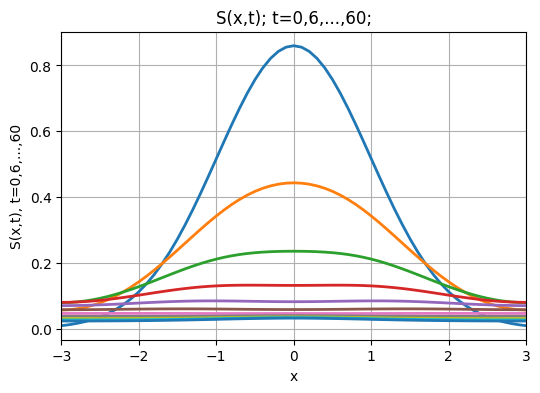

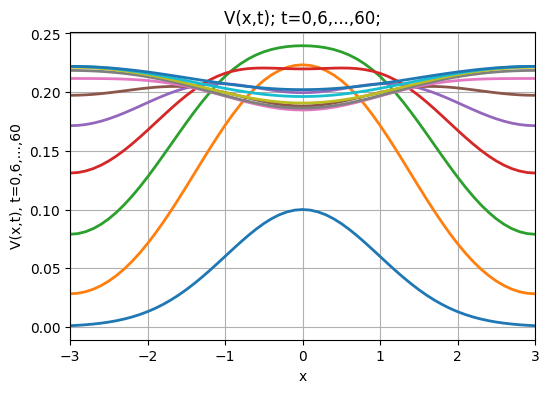

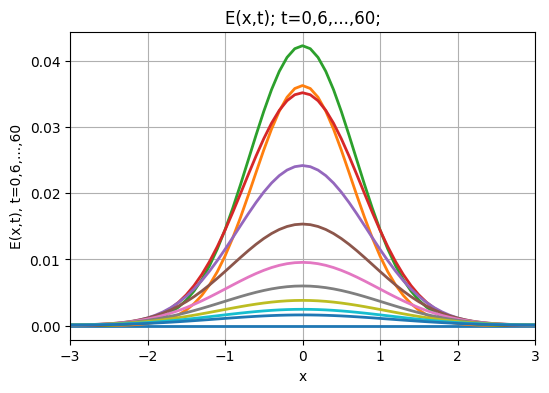

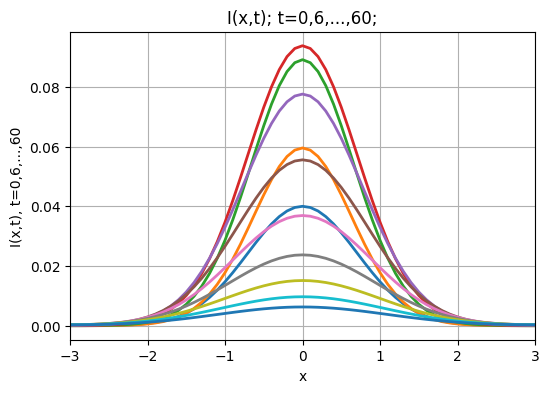

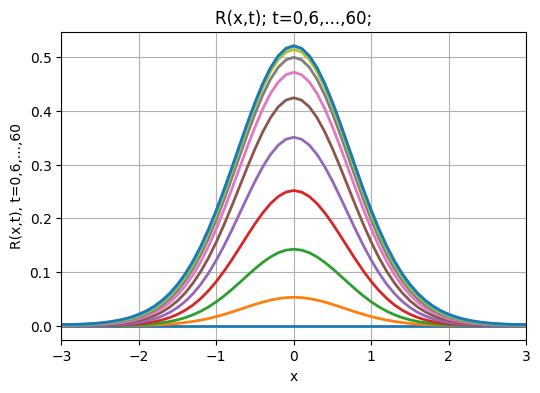

'\n# Plot numerical solutions\nif ip == 1:\n    # Plot S(x,t)\n    plt.figure()\n    plt.plot(xg, S_xplot, linewidth=2)\n    plt.xlabel("x")\n    plt.ylabel("S(x,t)")\n    plt.title("S(x,t); t=0,6,...,60")\n    plt.show()\n    \n    # Plot V(x,t)\n    plt.figure()\n    plt.plot(xg, V_xplot, linewidth=2)\n    plt.xlabel("x")\n    plt.ylabel("V(x,t)")\n    plt.title("V(x,t); t=0,6,...,60")\n    plt.show()\n    \n    # Plot E(x,t)\n    plt.figure()\n    plt.plot(xg, E_xplot, linewidth=2)\n    plt.xlabel("x")\n    plt.ylabel("E(x,t)")\n    plt.title("E(x,t); t=0,6,...,60")\n    plt.show()\n    \n    # Plot I(x,t)\n    plt.figure()\n    plt.plot(xg, I_xplot, linewidth=2)\n    plt.xlabel("x")\n    plt.ylabel("I(x,t)")\n    plt.title("I(x,t); t=0,6,...,60")\n    plt.show()\n    \n    # Plot R(x,t)\n    plt.figure()\n    plt.plot(xg, R_xplot, linewidth=2)\n    plt.xlabel("x")\n    plt.ylabel("R(x,t)")\n    plt.title("R(x,t); t=0,6,...,60")\n    plt.show()\n\nif ip == 2:\n    S_tplot = S_xplot[

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, ode, solve_ivp
import pandas as pd
import time
# Output format selection
ip = 1  # 1 for solutions vs x, 2 for solutions vs t at specific x

# Grid in x
nx = 61  # Number of spatial points
xl, xu = -3, 3  # Spatial domain boundaries
xg = np.linspace(xl, xu, nx,dtype=np.float64)  # Create a grid of x values
#xg = np.linspace(xl, xu, (xu-xl)/(nx-1))  # Create a grid of x values
#xg = np.array([float(f"{x:.1f}") for x in xg])

# Grid in t
if ip == 1:
    nout, t0, tf = 11, 0, 60  # 11 time points for t = 0, 6, ..., 60

elif ip == 2:
    nout, t0, tf = 61, 0, 60  # 61 time points for smoother plots in t

tout = np.linspace(t0, tf, nout, dtype=np.float64)  # Create a grid of time values
#tout = np.array([float(f"{t:.1f}") for t in tout])
# Parameters
beta, betae, betai, betav = 0.5140, 0.250, 1.0, 0.9  # Infection and transmission rates
sigma, gamma, delta = 1.0/2.0, 1.0/5.0, 1.0/365.0  # Rates for progression and recovery
mu, r, kappa, alpha = 5.50e-08, 1.140e-05, 1.857e-04, 9.30e-06  # Demographic and epidemiological parameters
theta, phi = 1.0/365.0, 1/20  # Immunization and waning rates
d1, d2, d3, d4, d5 = 0.05, 0.05, 0.025, 0.001, 0.0  # Diffusion coefficients

# Display selected parameters
print(f"\n\n betav = {betav:.3f} phi = {phi:.3f}\n")  # Display beta_v and phi values

# Initial conditions
u0 = np.zeros(5 * nx,dtype=np.float64)  # Initialize the state vector
for ix in range(nx):
    u0[ix] = 0.86 * np.exp(-(xg[ix]/1.4)**2)  # Initial condition for S(x,t)
    u0[ix+nx] = 0.10 * np.exp(-(xg[ix]/1.4)**2)  # Initial condition for V(x,t)
    u0[ix+2*nx] = 0  # Initial condition for E(x,t)
    u0[ix+3*nx] = 0.04 * np.exp(-xg[ix]**2)  # Initial condition for I(x,t)
    u0[ix+4*nx] = 0  # Initial condition for R(x,t)

'''
file_name = 'SVEIR_data_ip1_R.csv'
df = pd.read_csv(file_name)

# Step 3: Extract the second column (index 1, since Python uses 0-based indexing)
second_column = df.iloc[:, 1]

# Step 4: Convert to NumPy array
u0 = second_column.to_numpy()
'''
ncall = 0  # Counter for the number of calls to flu_1
rtol = 1e-6
atol = 1e-6

params = {
    "beta": beta, "betae": betae, "betai": betai, "betav": betav,
    "sigma": sigma, "gamma": gamma, "delta": delta, "mu": mu,
    "r": r, "kappa": kappa, "alpha": alpha, "theta": theta,
    "phi": phi, "d1": d1, "d2": d2, "d3": d3, "d4": d4, "d5": d5
}

'''

# Create DataFrame for output data
df_output = pd.DataFrame(out.T, columns=[str(int(t)) for t in tout])

# Add u0 as an extra column
df_output.insert(0, "SVEIR_Synth_Data", u0)  # Only first nx values (adjust if needed)

# Save to CSV
df_output.to_csv(f'SVEIR_data_ip{ip}.csv', index=False)
out = df.iloc[:, 2:].to_numpy().T
'''

'''
# Solve the ODE with parameters
out_2 = solve_ivp(flu_1, (t0, tf), u0, t_eval=tout, args=(params,),method='LSODA')

# Extract solution
#t_values = out.t
out = out_2.y.T
'''

# ODE integration
start = time.time()
out = odeint(flu_1, u0, tout, args=(params,), tfirst=True, rtol=1e-8, atol=1e-8, h0=0.01, mxstep=5000)
end = time.time()

print("MOL AVG Time = ", (end - start))

'''
# Parameters dictionary
params = {
    "beta": beta, "betae": betae, "betai": betai, "betav": betav,
    "sigma": sigma, "gamma": gamma, "delta": delta, "mu": mu,
    "r": r, "kappa": kappa, "alpha": alpha, "theta": theta,
    "phi": phi, "d1": d1, "d2": d2, "d3": d3, "d4": d4, "d5": d5
}

# Initialize the solver
solver = ode(flu_2)
solver.set_integrator("dopri5")  # Equivalent to RK45
solver.set_f_params(params)  # Pass parameters to the function
solver.set_initial_value(u0, t0)  # Set initial state and time

# Solve the ODE
solution = []
t_values = []
while solver.successful() and solver.t <= tf:
    solver.integrate(solver.t + (tf - t0) / (len(tout) - 1))
    t_values.append(solver.t)
    solution.append(solver.y)

# Convert to NumPy arrays
t_values = np.array(t_values)
solution = np.array(solution)
out = solution
'''

# Print dimensions of the output matrix
print(f"nrow(out) = {out.shape[0]}, ncol(out) = {out.shape[1]}")

# Arrays for plotting numerical solutions
V_xplot = np.zeros((nx, nout),dtype=np.float64)  # Array for V(x,t)
E_xplot = np.zeros((nx, nout),dtype=np.float64)  # Array for E(x,t)
S_xplot = np.zeros((nx, nout),dtype=np.float64)  # Array for S(x,t)
I_xplot = np.zeros((nx, nout),dtype=np.float64)  # Array for I(x,t)
R_xplot = np.zeros((nx, nout),dtype=np.float64)  # Array for R(x,t)

# Extract data from the output matrix for plotting
for it in range(nout):
    for ix in range(nx):
        S_xplot[ix, it] = out[it, ix]  # Extract S(x,t)
        V_xplot[ix, it] = out[it, ix+nx]  # Extract V(x,t)
        E_xplot[ix, it] = out[it, ix+2*nx]  # Extract E(x,t)
        I_xplot[ix, it] = out[it, ix+3*nx]  # Extract I(x,t)
        R_xplot[ix, it] = out[it, ix+4*nx]  # Extract R(x,t)

# Display numerical solutions
if ip == 1:
    for it in range(nout):
        if it in [0, 10]:  # Only display results for t = 0 and t = 60
            print("\n\n t x S(x,t) V(x,t)")
            print("\n E(x,t) I(x,t) R(x,t)")
            for ix in range(nx):
                print(f"\n {tout[it]:6.1f} {xg[ix]:7.2f} {S_xplot[ix, it]:12.5f} {V_xplot[ix, it]:12.5f}")
                print(f" {E_xplot[ix, it]:14.5f} {I_xplot[ix, it]:12.5f} {R_xplot[ix, it]:12.5f}")

if ip == 2:
    for it in range(nout):
        if it in [0, 60]:
            print("\n\n t       x       S(x,t)      V(x,t)")
            print(" E(x,t)   I(x,t)      R(x,t)")
            for ix in range(nx):
                print(f"\n {tout[it]:6.1f}{xg[ix]:7.2f}{S_xplot[ix, it]:12.5f}{V_xplot[ix, it]:12.5f}")
                print(f"{E_xplot[ix, it]:14.5f}{I_xplot[ix, it]:12.5f}{R_xplot[ix, it]:12.5f}")

# Calls to ODE routine
print(f"\n\n ncall = {ncall:5d}\n\n")

#'''
# Plot S, V, E, I, R numerical solutions vs x with t as a parameter (t = 0,6,...,60)
if ip == 1:
    plt.figure(figsize=(6, 4))
    plt.plot(xg, S_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("S(x,t), t=0,6,...,60")
    plt.title("S(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, V_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("V(x,t), t=0,6,...,60")
    plt.title("V(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, E_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("E(x,t), t=0,6,...,60")
    plt.title("E(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, I_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("I(x,t), t=0,6,...,60")
    plt.title("I(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, R_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("R(x,t), t=0,6,...,60")
    plt.title("R(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

# Plot S, V, E, I, R vs t at x = 0 (t = 0,1,...,60)
if ip == 2:
    S_tplot = np.zeros(nout,dtype=np.float64)
    V_tplot = np.zeros(nout,dtype=np.float64)
    E_tplot = np.zeros(nout,dtype=np.float64)
    I_tplot = np.zeros(nout,dtype=np.float64)
    R_tplot = np.zeros(nout,dtype=np.float64)

    for it in range(nout):
        S_tplot[it] = S_xplot[30, it]  # Adjusted index (R is 1-based, Python is 0-based)
        V_tplot[it] = V_xplot[30, it]
        E_tplot[it] = E_xplot[30, it]
        I_tplot[it] = I_xplot[30, it]
        R_tplot[it] = R_xplot[30, it]

    plt.figure(figsize=(6, 4))
    plt.plot(tout, S_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("S(x,t), x = 0")
    plt.title("S(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, V_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("V(x,t), x = 0")
    plt.title("V(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, E_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("E(x,t), x = 0")
    plt.title("E(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, I_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("I(x,t), x = 0")
    plt.title("I(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, R_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("R(x,t), x = 0")
    plt.title("R(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()
#'''

'''
# Plot numerical solutions
if ip == 1:
    # Plot S(x,t)
    plt.figure()
    plt.plot(xg, S_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("S(x,t)")
    plt.title("S(x,t); t=0,6,...,60")
    plt.show()

    # Plot V(x,t)
    plt.figure()
    plt.plot(xg, V_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("V(x,t)")
    plt.title("V(x,t); t=0,6,...,60")
    plt.show()

    # Plot E(x,t)
    plt.figure()
    plt.plot(xg, E_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("E(x,t)")
    plt.title("E(x,t); t=0,6,...,60")
    plt.show()

    # Plot I(x,t)
    plt.figure()
    plt.plot(xg, I_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("I(x,t)")
    plt.title("I(x,t); t=0,6,...,60")
    plt.show()

    # Plot R(x,t)
    plt.figure()
    plt.plot(xg, R_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("R(x,t)")
    plt.title("R(x,t); t=0,6,...,60")
    plt.show()

if ip == 2:
    S_tplot = S_xplot[30, :]  # x = 0 corresponds to index 30 in xg
    V_tplot = V_xplot[30, :]
    E_tplot = E_xplot[30, :]
    I_tplot = I_xplot[30, :]
    R_tplot = R_xplot[30, :]

    # Plot S(x,t)
    plt.figure()
    plt.plot(tout, S_tplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("S(x,t)")
    plt.title("S(x,t); t=0,6,...,60")
    plt.show()

    # Plot V(x,t)
    plt.figure()
    plt.plot(tout, V_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("V(x,t)")
    plt.title("V(x,t); t=0,6,...,60")
    plt.show()

    # Plot E(x,t)
    plt.figure()
    plt.plot(tout, E_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("E(x,t)")
    plt.title("E(x,t); t=0,6,...,60")
    plt.show()

    # Plot I(x,t)
    plt.figure()
    plt.plot(tout, I_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("I(x,t)")
    plt.title("I(x,t); t=0,6,...,60")
    plt.show()

    # Plot R(x,t)
    plt.figure()
    plt.plot(tout, R_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("R(x,t)")
    plt.title("R(x,t); t=0,6,...,60")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(tout, S_tplot, label="S(x,t)")
    #plt.plot(tout, V_tplot, label="V(x,t)")
    #plt.plot(tout, E_tplot, label="E(x,t)")
    #plt.plot(tout, I_tplot, label="I(x,t)")
    #plt.plot(tout, R_tplot, label="R(x,t)")
    plt.xlabel("t")
    plt.ylabel("Values")
    plt.title("S, V, E, I, R vs t at x = 0")
    plt.legend()
    plt.show()
'''

# R Output



 betav = 0.900 phi = 0.050

nrow(out) = 11, ncol(out) = 305


 t x S(x,t) V(x,t)

 E(x,t) I(x,t) R(x,t)

    0.0   -3.00      0.00872      0.00101
        0.00000      0.00000      0.00000

    0.0   -2.90      0.01178      0.00137
        0.00000      0.00001      0.00000

    0.0   -2.80      0.01575      0.00183
        0.00000      0.00002      0.00000

    0.0   -2.70      0.02085      0.00242
        0.00000      0.00003      0.00000

    0.0   -2.60      0.02733      0.00318
        0.00000      0.00005      0.00000

    0.0   -2.50      0.03545      0.00412
        0.00000      0.00008      0.00000

    0.0   -2.40      0.04552      0.00529
        0.00000      0.00013      0.00000

    0.0   -2.30      0.05786      0.00673
        0.00000      0.00020      0.00000

    0.0   -2.20      0.07279      0.00846
        0.00000      0.00032      0.00000

    0.0   -2.10      0.09064      0.01054
        0.00000      0.00049      0.00000

    0.0   -2.00      0.11173      0.01299
 

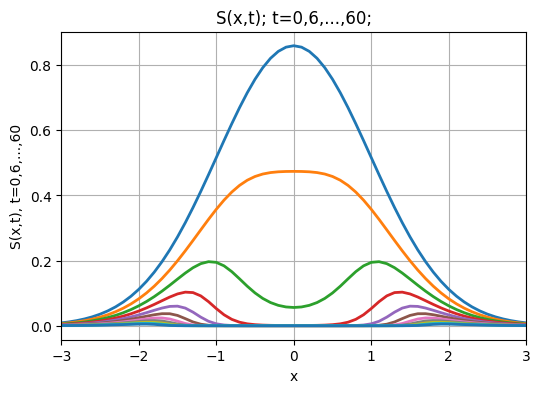

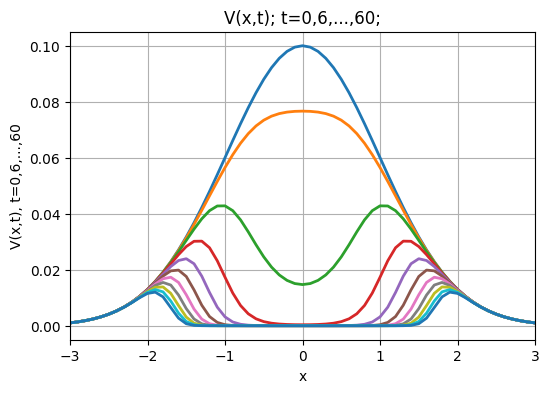

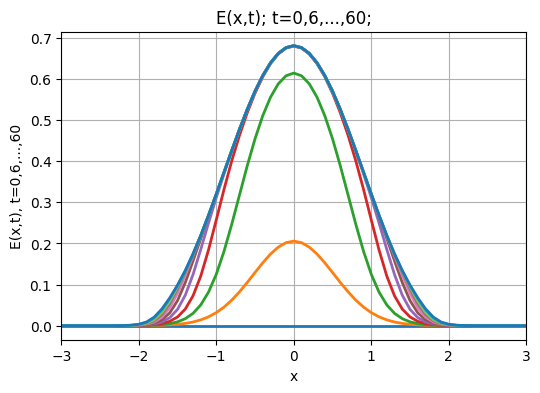

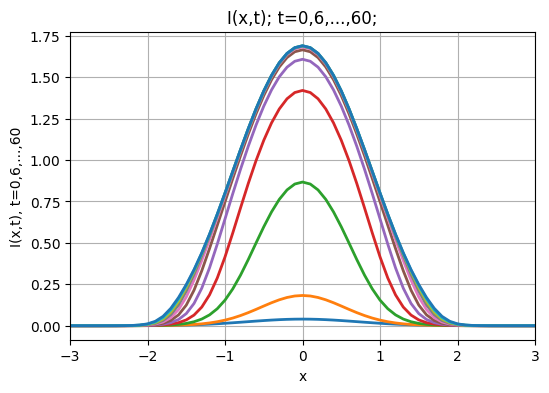

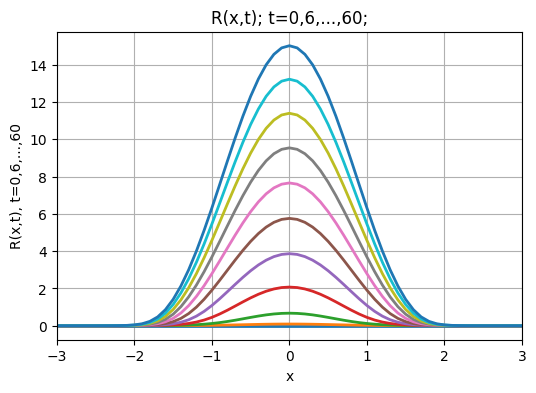

'\n# Plot numerical solutions\nif ip == 1:\n    # Plot S(x,t)\n    plt.figure()\n    plt.plot(xg, S_xplot, linewidth=2)\n    plt.xlabel("x")\n    plt.ylabel("S(x,t)")\n    plt.title("S(x,t); t=0,6,...,60")\n    plt.show()\n    \n    # Plot V(x,t)\n    plt.figure()\n    plt.plot(xg, V_xplot, linewidth=2)\n    plt.xlabel("x")\n    plt.ylabel("V(x,t)")\n    plt.title("V(x,t); t=0,6,...,60")\n    plt.show()\n    \n    # Plot E(x,t)\n    plt.figure()\n    plt.plot(xg, E_xplot, linewidth=2)\n    plt.xlabel("x")\n    plt.ylabel("E(x,t)")\n    plt.title("E(x,t); t=0,6,...,60")\n    plt.show()\n    \n    # Plot I(x,t)\n    plt.figure()\n    plt.plot(xg, I_xplot, linewidth=2)\n    plt.xlabel("x")\n    plt.ylabel("I(x,t)")\n    plt.title("I(x,t); t=0,6,...,60")\n    plt.show()\n    \n    # Plot R(x,t)\n    plt.figure()\n    plt.plot(xg, R_xplot, linewidth=2)\n    plt.xlabel("x")\n    plt.ylabel("R(x,t)")\n    plt.title("R(x,t); t=0,6,...,60")\n    plt.show()\n\nif ip == 2:\n    S_tplot = S_xplot[

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, ode, solve_ivp
import pandas as pd

# Output format selection
ip = 1  # 1 for solutions vs x, 2 for solutions vs t at specific x

# Grid in x
nx = 61  # Number of spatial points
xl, xu = -3, 3  # Spatial domain boundaries
xg = np.linspace(xl, xu, nx)  # Create a grid of x values
#xg = np.linspace(xl, xu, (xu-xl)/(nx-1))  # Create a grid of x values
#xg = np.array([float(f"{x:.1f}") for x in xg])

# Grid in t
if ip == 1:
    nout, t0, tf = 11, 0, 60  # 11 time points for t = 0, 6, ..., 60
elif ip == 2:
    nout, t0, tf = 61, 0, 60  # 61 time points for smoother plots in t

tout = np.linspace(t0, tf, nout)  # Create a grid of time values
#tout = np.array([float(f"{t:.1f}") for t in tout])
# Parameters
beta, betae, betai, betav = 0.5140, 0.250, 1.0, 0.9  # Infection and transmission rates
sigma, gamma, delta = 1.0/2.0, 1.0/5.0, 1.0/365.0  # Rates for progression and recovery
mu, r, kappa, alpha = 5.50e-08, 1.140e-05, 1.857e-04, 9.30e-06  # Demographic and epidemiological parameters
theta, phi = 1.0/365.0, 1/20  # Immunization and waning rates
d1, d2, d3, d4, d5 = 0.05, 0.05, 0.025, 0.001, 0.0  # Diffusion coefficients

# Display selected parameters
print(f"\n\n betav = {betav:.3f} phi = {phi:.3f}\n")  # Display beta_v and phi values

# Initial conditions
u0 = np.zeros(5 * nx)  # Initialize the state vector
for ix in range(nx):
    u0[ix] = 0.86 * np.exp(-(xg[ix]/1.4)**2)  # Initial condition for S(x,t)
    u0[ix+nx] = 0.10 * np.exp(-(xg[ix]/1.4)**2)  # Initial condition for V(x,t)
    u0[ix+2*nx] = 0  # Initial condition for E(x,t)
    u0[ix+3*nx] = 0.04 * np.exp(-xg[ix]**2)  # Initial condition for I(x,t)
    u0[ix+4*nx] = 0  # Initial condition for R(x,t)

'''
file_name = 'SVEIR_data_ip1_R.csv'
df = pd.read_csv(file_name)

# Step 3: Extract the second column (index 1, since Python uses 0-based indexing)
second_column = df.iloc[:, 1]

# Step 4: Convert to NumPy array
u0 = second_column.to_numpy()
'''
ncall = 0  # Counter for the number of calls to flu_1
rtol = 1e-6
atol = 1e-6

params = {
    "beta": beta, "betae": betae, "betai": betai, "betav": betav,
    "sigma": sigma, "gamma": gamma, "delta": delta, "mu": mu,
    "r": r, "kappa": kappa, "alpha": alpha, "theta": theta,
    "phi": phi, "d1": d1, "d2": d2, "d3": d3, "d4": d4, "d5": d5
}

'''
# ODE integration
out = odeint(flu_1, u0, tout, args=(params,), tfirst=True)

# Create DataFrame for output data
df_output = pd.DataFrame(out.T, columns=[str(int(t)) for t in tout])

# Add u0 as an extra column
df_output.insert(0, "SVEIR_Synth_Data", u0)  # Only first nx values (adjust if needed)

# Save to CSV
df_output.to_csv(f'SVEIR_data_ip{ip}.csv', index=False)
out = df.iloc[:, 2:].to_numpy().T
'''

#'''
# Solve the ODE with parameters
out_2 = solve_ivp(flu_1, [t0, tf], u0, t_eval=tout, args=(params,),method='LSODA',atol=1e-8, rtol=1e-8,first_step=0.1, max_step=0.1)

# Extract solution
#t_values = out.t
out = out_2.y.T

'''
# Parameters dictionary
params = {
    "beta": beta, "betae": betae, "betai": betai, "betav": betav,
    "sigma": sigma, "gamma": gamma, "delta": delta, "mu": mu,
    "r": r, "kappa": kappa, "alpha": alpha, "theta": theta,
    "phi": phi, "d1": d1, "d2": d2, "d3": d3, "d4": d4, "d5": d5
}

# Initialize the solver
solver = ode(flu_2)
solver.set_integrator("dopri5")  # Equivalent to RK45
solver.set_f_params(params)  # Pass parameters to the function
solver.set_initial_value(u0, t0)  # Set initial state and time

# Solve the ODE
solution = []
t_values = []
while solver.successful() and solver.t <= tf:
    solver.integrate(solver.t + (tf - t0) / (len(tout) - 1))
    t_values.append(solver.t)
    solution.append(solver.y)

# Convert to NumPy arrays
t_values = np.array(t_values)
solution = np.array(solution)
out = solution
'''

# Print dimensions of the output matrix
print(f"nrow(out) = {out.shape[0]}, ncol(out) = {out.shape[1]}")

# Arrays for plotting numerical solutions
V_xplot = np.zeros((nx, nout))  # Array for V(x,t)
E_xplot = np.zeros((nx, nout))  # Array for E(x,t)
S_xplot = np.zeros((nx, nout))  # Array for S(x,t)
I_xplot = np.zeros((nx, nout))  # Array for I(x,t)
R_xplot = np.zeros((nx, nout))  # Array for R(x,t)

# Extract data from the output matrix for plotting
for it in range(nout):
    for ix in range(nx):
        S_xplot[ix, it] = out[it, ix]  # Extract S(x,t)
        V_xplot[ix, it] = out[it, ix+nx]  # Extract V(x,t)
        E_xplot[ix, it] = out[it, ix+2*nx]  # Extract E(x,t)
        I_xplot[ix, it] = out[it, ix+3*nx]  # Extract I(x,t)
        R_xplot[ix, it] = out[it, ix+4*nx]  # Extract R(x,t)

# Display numerical solutions
if ip == 1:
    for it in range(nout):
        if it in [0, 10]:  # Only display results for t = 0 and t = 60
            print("\n\n t x S(x,t) V(x,t)")
            print("\n E(x,t) I(x,t) R(x,t)")
            for ix in range(nx):
                print(f"\n {tout[it]:6.1f} {xg[ix]:7.2f} {S_xplot[ix, it]:12.5f} {V_xplot[ix, it]:12.5f}")
                print(f" {E_xplot[ix, it]:14.5f} {I_xplot[ix, it]:12.5f} {R_xplot[ix, it]:12.5f}")

if ip == 2:
    for it in range(nout):
        if it in [0, 60]:
            print("\n\n t       x       S(x,t)      V(x,t)")
            print(" E(x,t)   I(x,t)      R(x,t)")
            for ix in range(nx):
                print(f"\n {tout[it]:6.1f}{xg[ix]:7.2f}{S_xplot[ix, it]:12.5f}{V_xplot[ix, it]:12.5f}")
                print(f"{E_xplot[ix, it]:14.5f}{I_xplot[ix, it]:12.5f}{R_xplot[ix, it]:12.5f}")

# Calls to ODE routine
print(f"\n\n ncall = {ncall:5d}\n\n")

#'''
# Plot S, V, E, I, R numerical solutions vs x with t as a parameter (t = 0,6,...,60)
if ip == 1:
    plt.figure(figsize=(6, 4))
    plt.plot(xg, S_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("S(x,t), t=0,6,...,60")
    plt.title("S(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, V_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("V(x,t), t=0,6,...,60")
    plt.title("V(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, E_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("E(x,t), t=0,6,...,60")
    plt.title("E(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, I_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("I(x,t), t=0,6,...,60")
    plt.title("I(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, R_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("R(x,t), t=0,6,...,60")
    plt.title("R(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

# Plot S, V, E, I, R vs t at x = 0 (t = 0,1,...,60)
if ip == 2:
    S_tplot = np.zeros(nout)
    V_tplot = np.zeros(nout)
    E_tplot = np.zeros(nout)
    I_tplot = np.zeros(nout)
    R_tplot = np.zeros(nout)

    for it in range(nout):
        S_tplot[it] = S_xplot[30, it]  # Adjusted index (R is 1-based, Python is 0-based)
        V_tplot[it] = V_xplot[30, it]
        E_tplot[it] = E_xplot[30, it]
        I_tplot[it] = I_xplot[30, it]
        R_tplot[it] = R_xplot[30, it]

    plt.figure(figsize=(6, 4))
    plt.plot(tout, S_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("S(x,t), x = 0")
    plt.title("S(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, V_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("V(x,t), x = 0")
    plt.title("V(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, E_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("E(x,t), x = 0")
    plt.title("E(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, I_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("I(x,t), x = 0")
    plt.title("I(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, R_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("R(x,t), x = 0")
    plt.title("R(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()
#'''

# FVM

In [ ]:
import numpy as np

def flu_1_fvm(t, u, parms):
    """
    Function flu_1_fvm computes the t derivative vector using FVM with Diffusion
    """
    global ncall

    # Extract parameters from the input dictionary for readability
    beta, betae, betai, betav = parms["beta"], parms["betae"], parms["betai"], parms["betav"]
    alpha, phi, delta, theta, kappa = parms["alpha"], parms["phi"], parms["delta"], parms["theta"], parms["kappa"]
    sigma, gamma, r, d1, d2, d3, d4, d5 = parms["sigma"], parms["gamma"], parms["r"], parms["d1"], parms["d2"], parms["d3"], parms["d4"], parms["d5"]

    # Split the state vector into the five components: S, V, E, I, R
    nx = len(u) // 5  # Number of spatial points
    S, V, E, I, R = np.split(u, 5)  # Split the 1D state vector into five 1D arrays

    # Define spatial domain boundaries and Neumann boundary conditions
    xl, xu = -3, 3  # Domain boundaries in x
    nl, nu = 2, 2  # Neumann boundary condition specification

    # Initialize the derivative vector
    dudt = np.zeros(5 * nx)

    # Calculate cell widths (assuming uniform grid)
    dx = (xu - xl) / (nx - 1)

    # --- Flux Calculations (Central Differencing for Diffusion Terms) ---

    # Function to approximate d^2var/dx^2 using FVM-like stencil
    def approximate_diffusion(var, d):
        diffusion_term = np.zeros(nx)  # Result vector
        for i in range(1, nx - 1):  # Loop from 1 to nx-2 (Python indexing)
            diffusion_term[i] = d * (var[i+1] - 2*var[i] + var[i-1]) / (dx**2)

        # Boundary conditions: zero flux dS/dx = 0
        diffusion_term[0] = d * (var[1] - var[0]) / (dx**2)  # Left boundary.
        diffusion_term[nx-1] = d * (var[nx-2] - var[nx-1]) / (dx**2)  # Right Boundary

        return diffusion_term

    # Calculate Diffusion terms for each variable
    diffusion_S = approximate_diffusion(S, d1)
    diffusion_V = approximate_diffusion(V, d2)
    diffusion_E = approximate_diffusion(E, d3)
    diffusion_I = approximate_diffusion(I, d4)
    diffusion_R = approximate_diffusion(R, d5)

    # --- Loop over cells and compute the change in each cell ---
    for i in range(nx):

        # Source/Sink terms (ODE part)
        ES = E[i] * S[i]
        IS = I[i] * S[i]
        EV = E[i] * V[i]
        IV = I[i] * V[i]
        IE = I[i] * E[i]
        IR = I[i] * R[i]

        S_source = -beta * betae * ES - beta * betai * IS + alpha * IS - phi * S[i] - r * S[i] + delta * R[i] + theta * V[i] + r
        V_source = -beta * betae * betav * EV - beta * betai * betav * IV + alpha * IV - r * V[i] - theta * V[i] + phi * S[i]
        E_source = beta * betae * ES + beta * betai * IS + beta * betae * betav * EV + beta * betai * betav * IV + alpha * IE - (r + kappa + sigma) * E[i]
        I_source = sigma * E[i] - (r + alpha + gamma) * I[i] + alpha * (I[i]**2)
        R_source = kappa * E[i] + gamma * I[i] - r * R[i] - delta * R[i] + alpha * IR


        # Update the derivatives - NOW INCLUDE DIFFUSION TERMS
        dudt[i] = S_source + diffusion_S[i]  # dS/dt
        dudt[i + nx] = V_source + diffusion_V[i]  # dV/dt
        dudt[i + 2 * nx] = E_source + diffusion_E[i]  # dE/dt
        dudt[i + 3 * nx] = I_source + diffusion_I[i]  # dI/dt
        dudt[i + 4 * nx] = R_source + diffusion_R[i]  # dR/dt

    return dudt  # Must return as a list



 betav = 0.900 phi = 0.050

FVM AVG Time =  3.5717215538024902
nrow(out) = 11, ncol(out) = 305


 t x S(x,t) V(x,t)

 E(x,t) I(x,t) R(x,t)

    0.0   -3.00      0.00872      0.00101
        0.00000      0.00000      0.00000

    0.0   -2.90      0.01178      0.00137
        0.00000      0.00001      0.00000

    0.0   -2.80      0.01575      0.00183
        0.00000      0.00002      0.00000

    0.0   -2.70      0.02085      0.00242
        0.00000      0.00003      0.00000

    0.0   -2.60      0.02733      0.00318
        0.00000      0.00005      0.00000

    0.0   -2.50      0.03545      0.00412
        0.00000      0.00008      0.00000

    0.0   -2.40      0.04552      0.00529
        0.00000      0.00013      0.00000

    0.0   -2.30      0.05786      0.00673
        0.00000      0.00020      0.00000

    0.0   -2.20      0.07279      0.00846
        0.00000      0.00032      0.00000

    0.0   -2.10      0.09064      0.01054
        0.00000      0.00049      0.00000

    0.0 

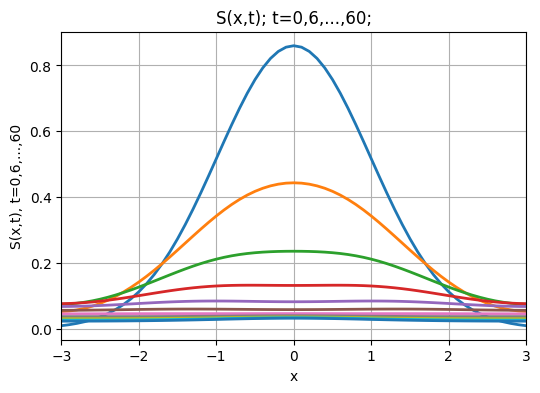

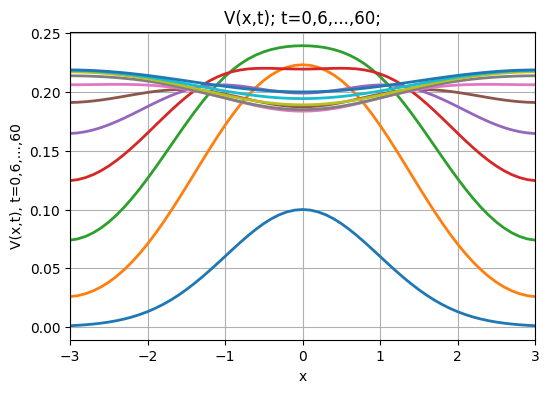

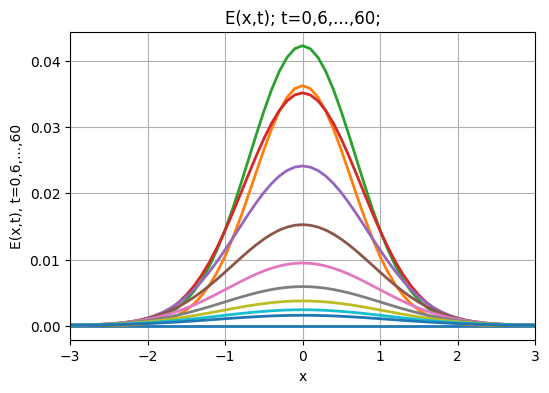

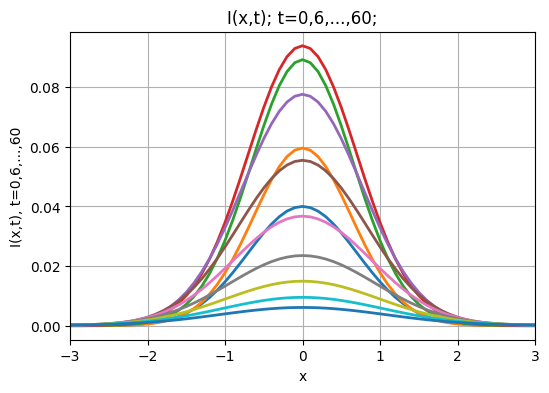

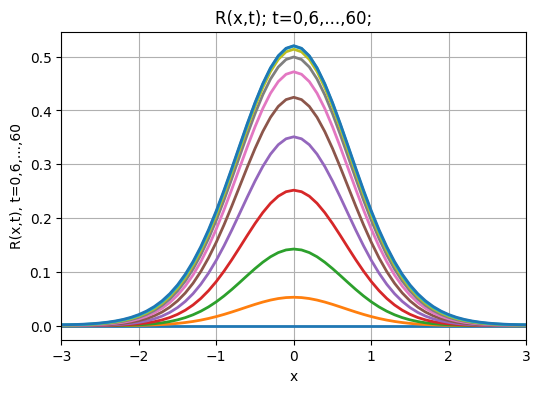

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, ode, solve_ivp
import pandas as pd
import time
# Output format selection
ip = 1  # 1 for solutions vs x, 2 for solutions vs t at specific x

# Grid in x
nx = 61  # Number of spatial points
xl, xu = -3, 3  # Spatial domain boundaries
xg = np.linspace(xl, xu, nx,dtype=np.float64)  # Create a grid of x values
#xg = np.linspace(xl, xu, (xu-xl)/(nx-1))  # Create a grid of x values
#xg = np.array([float(f"{x:.1f}") for x in xg])

# Grid in t
if ip == 1:
    nout, t0, tf = 11, 0, 60  # 11 time points for t = 0, 6, ..., 60

elif ip == 2:
    nout, t0, tf = 61, 0, 60  # 61 time points for smoother plots in t

tout = np.linspace(t0, tf, nout, dtype=np.float64)  # Create a grid of time values
#tout = np.array([float(f"{t:.1f}") for t in tout])
# Parameters
beta, betae, betai, betav = 0.5140, 0.250, 1.0, 0.9  # Infection and transmission rates
sigma, gamma, delta = 1.0/2.0, 1.0/5.0, 1.0/365.0  # Rates for progression and recovery
mu, r, kappa, alpha = 5.50e-08, 1.140e-05, 1.857e-04, 9.30e-06  # Demographic and epidemiological parameters
theta, phi = 1.0/365.0, 1/20  # Immunization and waning rates
d1, d2, d3, d4, d5 = 0.05, 0.05, 0.025, 0.001, 0.0  # Diffusion coefficients

# Display selected parameters
print(f"\n\n betav = {betav:.3f} phi = {phi:.3f}\n")  # Display beta_v and phi values

# Initial conditions
u0 = np.zeros(5 * nx,dtype=np.float64)  # Initialize the state vector
for ix in range(nx):
    u0[ix] = 0.86 * np.exp(-(xg[ix]/1.4)**2)  # Initial condition for S(x,t)
    u0[ix+nx] = 0.10 * np.exp(-(xg[ix]/1.4)**2)  # Initial condition for V(x,t)
    u0[ix+2*nx] = 0  # Initial condition for E(x,t)
    u0[ix+3*nx] = 0.04 * np.exp(-xg[ix]**2)  # Initial condition for I(x,t)
    u0[ix+4*nx] = 0  # Initial condition for R(x,t)

'''
file_name = 'SVEIR_data_ip1_R.csv'
df = pd.read_csv(file_name)

# Step 3: Extract the second column (index 1, since Python uses 0-based indexing)
second_column = df.iloc[:, 1]

# Step 4: Convert to NumPy array
u0 = second_column.to_numpy()
'''
ncall = 0  # Counter for the number of calls to flu_1
rtol = 1e-6
atol = 1e-6

params = {
    "beta": beta, "betae": betae, "betai": betai, "betav": betav,
    "sigma": sigma, "gamma": gamma, "delta": delta, "mu": mu,
    "r": r, "kappa": kappa, "alpha": alpha, "theta": theta,
    "phi": phi, "d1": d1, "d2": d2, "d3": d3, "d4": d4, "d5": d5
}

'''

# Create DataFrame for output data
df_output = pd.DataFrame(out.T, columns=[str(int(t)) for t in tout])

# Add u0 as an extra column
df_output.insert(0, "SVEIR_Synth_Data", u0)  # Only first nx values (adjust if needed)

# Save to CSV
df_output.to_csv(f'SVEIR_data_ip{ip}.csv', index=False)
out = df.iloc[:, 2:].to_numpy().T
'''

'''
# Solve the ODE with parameters
out_2 = solve_ivp(flu_1, (t0, tf), u0, t_eval=tout, args=(params,),method='LSODA')

# Extract solution
#t_values = out.t
out = out_2.y.T
'''

# ODE integration
start = time.time()
out = odeint(flu_1_fvm, u0, tout, args=(params,), tfirst=True, rtol=1e-8, atol=1e-8, h0=0.01, mxstep=5000)
end = time.time()

print("FVM AVG Time = ", (end - start))

'''
# Parameters dictionary
params = {
    "beta": beta, "betae": betae, "betai": betai, "betav": betav,
    "sigma": sigma, "gamma": gamma, "delta": delta, "mu": mu,
    "r": r, "kappa": kappa, "alpha": alpha, "theta": theta,
    "phi": phi, "d1": d1, "d2": d2, "d3": d3, "d4": d4, "d5": d5
}

# Initialize the solver
solver = ode(flu_2)
solver.set_integrator("dopri5")  # Equivalent to RK45
solver.set_f_params(params)  # Pass parameters to the function
solver.set_initial_value(u0, t0)  # Set initial state and time

# Solve the ODE
solution = []
t_values = []
while solver.successful() and solver.t <= tf:
    solver.integrate(solver.t + (tf - t0) / (len(tout) - 1))
    t_values.append(solver.t)
    solution.append(solver.y)

# Convert to NumPy arrays
t_values = np.array(t_values)
solution = np.array(solution)
out = solution
'''

# Print dimensions of the output matrix
print(f"nrow(out) = {out.shape[0]}, ncol(out) = {out.shape[1]}")

# Arrays for plotting numerical solutions
V_xplot = np.zeros((nx, nout),dtype=np.float64)  # Array for V(x,t)
E_xplot = np.zeros((nx, nout),dtype=np.float64)  # Array for E(x,t)
S_xplot = np.zeros((nx, nout),dtype=np.float64)  # Array for S(x,t)
I_xplot = np.zeros((nx, nout),dtype=np.float64)  # Array for I(x,t)
R_xplot = np.zeros((nx, nout),dtype=np.float64)  # Array for R(x,t)

# Extract data from the output matrix for plotting
for it in range(nout):
    for ix in range(nx):
        S_xplot[ix, it] = out[it, ix]  # Extract S(x,t)
        V_xplot[ix, it] = out[it, ix+nx]  # Extract V(x,t)
        E_xplot[ix, it] = out[it, ix+2*nx]  # Extract E(x,t)
        I_xplot[ix, it] = out[it, ix+3*nx]  # Extract I(x,t)
        R_xplot[ix, it] = out[it, ix+4*nx]  # Extract R(x,t)

# Display numerical solutions
if ip == 1:
    for it in range(nout):
        if it in [0, 10]:  # Only display results for t = 0 and t = 60
            print("\n\n t x S(x,t) V(x,t)")
            print("\n E(x,t) I(x,t) R(x,t)")
            for ix in range(nx):
                print(f"\n {tout[it]:6.1f} {xg[ix]:7.2f} {S_xplot[ix, it]:12.5f} {V_xplot[ix, it]:12.5f}")
                print(f" {E_xplot[ix, it]:14.5f} {I_xplot[ix, it]:12.5f} {R_xplot[ix, it]:12.5f}")

if ip == 2:
    for it in range(nout):
        if it in [0, 60]:
            print("\n\n t       x       S(x,t)      V(x,t)")
            print(" E(x,t)   I(x,t)      R(x,t)")
            for ix in range(nx):
                print(f"\n {tout[it]:6.1f}{xg[ix]:7.2f}{S_xplot[ix, it]:12.5f}{V_xplot[ix, it]:12.5f}")
                print(f"{E_xplot[ix, it]:14.5f}{I_xplot[ix, it]:12.5f}{R_xplot[ix, it]:12.5f}")

# Calls to ODE routine
print(f"\n\n ncall = {ncall:5d}\n\n")

#'''
# Plot S, V, E, I, R numerical solutions vs x with t as a parameter (t = 0,6,...,60)
if ip == 1:
    plt.figure(figsize=(6, 4))
    plt.plot(xg, S_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("S(x,t), t=0,6,...,60")
    plt.title("S(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, V_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("V(x,t), t=0,6,...,60")
    plt.title("V(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, E_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("E(x,t), t=0,6,...,60")
    plt.title("E(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, I_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("I(x,t), t=0,6,...,60")
    plt.title("I(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, R_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("R(x,t), t=0,6,...,60")
    plt.title("R(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

# Plot S, V, E, I, R vs t at x = 0 (t = 0,1,...,60)
if ip == 2:
    S_tplot = np.zeros(nout,dtype=np.float64)
    V_tplot = np.zeros(nout,dtype=np.float64)
    E_tplot = np.zeros(nout,dtype=np.float64)
    I_tplot = np.zeros(nout,dtype=np.float64)
    R_tplot = np.zeros(nout,dtype=np.float64)

    for it in range(nout):
        S_tplot[it] = S_xplot[30, it]  # Adjusted index (R is 1-based, Python is 0-based)
        V_tplot[it] = V_xplot[30, it]
        E_tplot[it] = E_xplot[30, it]
        I_tplot[it] = I_xplot[30, it]
        R_tplot[it] = R_xplot[30, it]

    plt.figure(figsize=(6, 4))
    plt.plot(tout, S_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("S(x,t), x = 0")
    plt.title("S(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, V_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("V(x,t), x = 0")
    plt.title("V(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, E_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("E(x,t), x = 0")
    plt.title("E(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, I_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("I(x,t), x = 0")
    plt.title("I(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, R_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("R(x,t), x = 0")
    plt.title("R(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()


# Euler 2nd Derivative Approximation



 betav = 0.900 phi = 0.050

Euler AVG Time =  0.1370081901550293
nrow(out) = 11, ncol(out) = 105


 t x S(x,t) V(x,t)

 E(x,t) I(x,t) R(x,t)

    0.0   -3.00      0.00872      0.00101
        0.00000      0.00000      0.00000

    0.0   -2.70      0.02085      0.00242
        0.00000      0.00003      0.00000

    0.0   -2.40      0.04552      0.00529
        0.00000      0.00013      0.00000

    0.0   -2.10      0.09064      0.01054
        0.00000      0.00049      0.00000

    0.0   -1.80      0.16466      0.01915
        0.00000      0.00157      0.00000

    0.0   -1.50      0.27286      0.03173
        0.00000      0.00422      0.00000

    0.0   -1.20      0.41250      0.04797
        0.00000      0.00948      0.00000

    0.0   -0.90      0.56888      0.06615
        0.00000      0.01779      0.00000

    0.0   -0.60      0.71570      0.08322
        0.00000      0.02791      0.00000

    0.0   -0.30      0.82140      0.09551
        0.00000      0.03656      0.00000

    0.

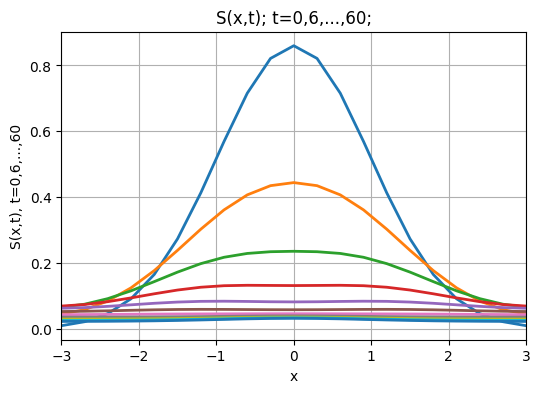

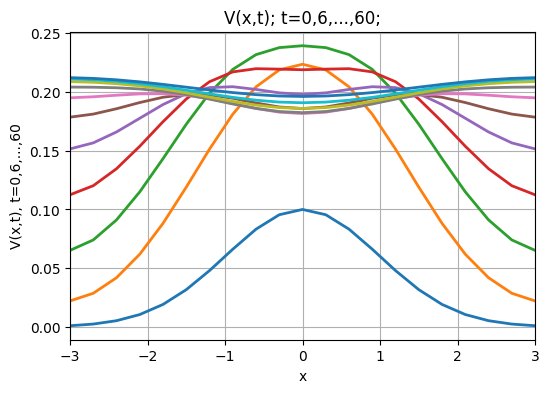

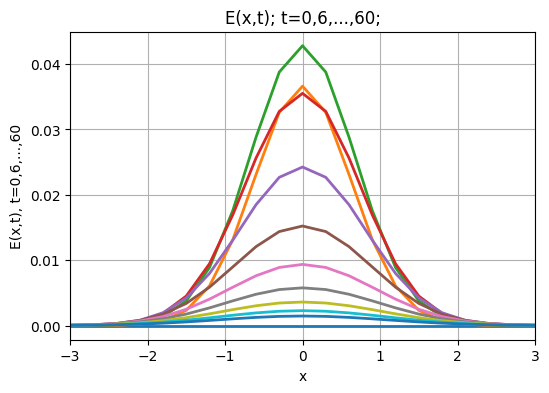

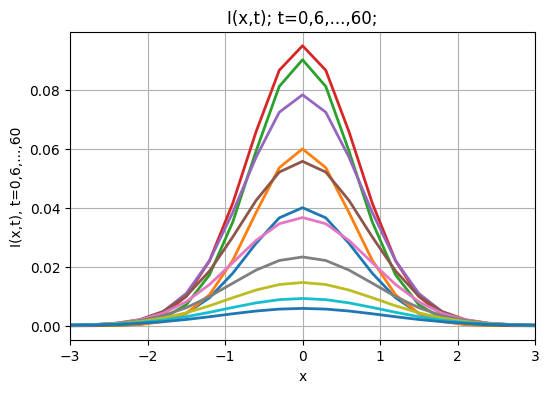

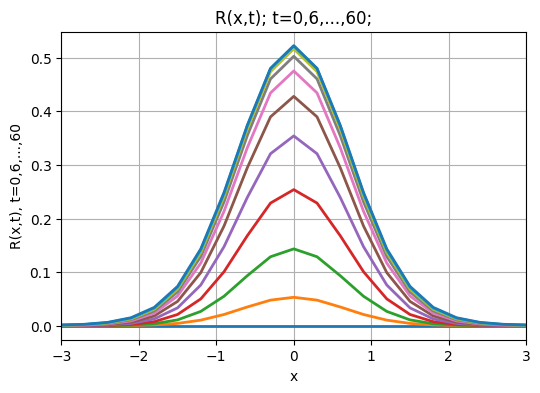

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import root_scalar
from scipy.sparse import csr_matrix
from multiprocessing import Pool, cpu_count
from scipy.optimize import minimize
from scipy.integrate import quad
from scipy.special import digamma
from scipy.integrate import odeint, ode, solve_ivp

def euler_first_derivative(xl, xu, n, u):
    """
    Compute the first derivative using Euler's method.
    """
    dx = (xu - xl) / (n - 1)
    ux = np.zeros(n)

    # Forward difference for interior points
    for i in range(n - 1):
        ux[i] = (u[i + 1] - u[i]) / dx

    # Boundary condition for last point (backward difference)
    ux[n - 1] = (u[n - 1] - u[n - 2]) / dx

    return ux

def euler_second_derivative(xl, xu, n, u):
    """
    Compute the second derivative using a central difference approximation.
    """
    dx = (xu - xl) / (n - 1)
    uxx = np.zeros(n)

    # Central difference for interior points
    for i in range(1, n - 1):
        uxx[i] = (u[i + 1] - 2 * u[i] + u[i - 1]) / dx**2

    # Boundary conditions (set second derivative to zero at boundaries)
    uxx[0] = 0
    uxx[n - 1] = 0

    return uxx

def flu_1(t, u, parms):
    """
    Computes the time derivative vector of the S, V, E, I, R vectors.

    Args:
        t (float): Time variable (not used in computation but required for solver)
        u (numpy array): State vector containing S, V, E, I, R values
        parms (dict): Dictionary of parameters

    Returns:
        numpy array: Time derivative of the state vector
    """
    global ncall

    # Extract parameters from the input dictionary for readability
    beta, betae, betai, betav = parms["beta"], parms["betae"], parms["betai"], parms["betav"]
    alpha, phi, delta, theta, kappa = parms["alpha"], parms["phi"], parms["delta"], parms["theta"], parms["kappa"]
    sigma, gamma, r, d1, d2, d3, d4, d5 = parms["sigma"], parms["gamma"], parms["r"], parms["d1"], parms["d2"], parms["d3"], parms["d4"], parms["d5"]

    # Split the state vector into the five components: S, V, E, I, R
    nx = len(u) // 5  # Number of spatial points
    S, V, E, I, R = np.split(u, 5)  # Split the 1D state vector into five 1D arrays

    # Define spatial domain boundaries and Neumann boundary conditions
    xl, xu = -3, 3  # Domain boundaries in x
    nl, nu = 2, 2  # Neumann boundary condition specification

    # Compute the first spatial derivatives
    Sx, Vx, Ex, Ix, Rx = (
        euler_first_derivative(xl, xu, nx, S),
        euler_first_derivative(xl, xu, nx, V),
        euler_first_derivative(xl, xu, nx, E),
        euler_first_derivative(xl, xu, nx, I),
        euler_first_derivative(xl, xu, nx, R)
    )

    # Apply Neumann boundary conditions: zero gradient at the boundaries
    Sx[0], Sx[nx-1] = 0, 0
    Vx[0], Vx[nx-1] = 0, 0
    Ex[0], Ex[nx-1] = 0, 0
    Ix[0], Ix[nx-1] = 0, 0
    Rx[0], Rx[nx-1] = 0, 0

    # Compute the second spatial derivatives (assume dss044 is a predefined function)
    Sxx, Vxx, Exx, Ixx, Rxx = (
        euler_second_derivative(xl, xu, nx, S),
        euler_second_derivative(xl, xu, nx, V),
        euler_second_derivative(xl, xu, nx, E),
        euler_second_derivative(xl, xu, nx, I),
        euler_second_derivative(xl, xu, nx, R)
    )

    # Initialize arrays for the time derivatives of S, V, E, I, R
    St, Vt, Et, It, Rt = np.zeros(nx), np.zeros(nx), np.zeros(nx), np.zeros(nx), np.zeros(nx)

    # Compute the PDEs for each spatial point
    for i in range(nx):
        # Intermediate terms to simplify the equations
        ES, IS, EV, IV, IE, IR = (
            E[i] * S[i],  # E(x,t) * S(x,t)
            I[i] * S[i],  # I(x,t) * S(x,t)
            E[i] * V[i],  # E(x,t) * V(x,t)
            I[i] * V[i],  # I(x,t) * V(x,t)
            I[i] * E[i],  # I(x,t) * E(x,t)
            I[i] * R[i]   # I(x,t) * R(x,t)
        )

        # Equations for the time derivatives
        St[i] = -beta * betae * ES - beta * betai * IS + alpha * IS - phi * S[i] - r * S[i] + delta * R[i] + theta * V[i] + r + d1 * Sxx[i]
        Vt[i] = -beta * betae * betav * EV - beta * betai * betav * IV + alpha * IV - r * V[i] - theta * V[i] + phi * S[i] + d2 * Vxx[i]
        Et[i] = beta * betae * ES + beta * betai * IS + beta * betae * betav * EV + beta * betai * betav * IV + alpha * IE - (r + kappa + sigma) * E[i] + d3 * Exx[i]
        It[i] = sigma * E[i] - (r + alpha + gamma) * I[i] + alpha * (I[i] ** 2) + d4 * Ixx[i]
        Rt[i] = kappa * E[i] + gamma * I[i] - r * R[i] - delta * R[i] + alpha * IR + d5 * Rxx[i]

    # Concatenate the time derivative arrays into a single vector
    ut = np.concatenate([St, Vt, Et, It, Rt])

    # Increment the global counter for function calls
    ncall += 1

    return ut  # Return the time derivatives

# Load functions for analytical solutions and derivatives (assume they are defined)
# from flu_1 import flu_1
# from dss004 import dss004
# from dss044 import dss044

# Output format selection
ip = 1  # 1 for solutions vs x, 2 for solutions vs t at specific x

# Grid in x
nx = 21  # Number of spatial points
xl, xu = -3, 3  # Spatial domain boundaries
xg = np.linspace(xl, xu, nx)  # Create a grid of x values
#xg = np.linspace(xl, xu, (xu-xl)/(nx-1))  # Create a grid of x values
#xg = np.array([float(f"{x:.1f}") for x in xg])

# Grid in t
if ip == 1:
    nout, t0, tf = 11, 0, 60  # 11 time points for t = 0, 6, ..., 60
elif ip == 2:
    nout, t0, tf = 61, 0, 60  # 61 time points for smoother plots in t

tout = np.linspace(t0, tf, nout)  # Create a grid of time values
#tout = np.array([float(f"{t:.1f}") for t in tout])
# Parameters
beta, betae, betai, betav = 0.5140, 0.250, 1.0, 0.9  # Infection and transmission rates
sigma, gamma, delta = 1.0/2.0, 1.0/5.0, 1.0/365.0  # Rates for progression and recovery
mu, r, kappa, alpha = 5.50e-08, 1.140e-05, 1.857e-04, 9.30e-06  # Demographic and epidemiological parameters
theta, phi = 1.0/365.0, 1/20  # Immunization and waning rates
d1, d2, d3, d4, d5 = 0.05, 0.05, 0.025, 0.001, 0.0  # Diffusion coefficients

# Display selected parameters
print(f"\n\n betav = {betav:.3f} phi = {phi:.3f}\n")  # Display beta_v and phi values

# Initial conditions
u0 = np.zeros(5 * nx)  # Initialize the state vector
for ix in range(nx):
    u0[ix] = 0.86 * np.exp(-(xg[ix]/1.4)**2)  # Initial condition for S(x,t)
    u0[ix+nx] = 0.10 * np.exp(-(xg[ix]/1.4)**2)  # Initial condition for V(x,t)
    u0[ix+2*nx] = 0  # Initial condition for E(x,t)
    u0[ix+3*nx] = 0.04 * np.exp(-xg[ix]**2)  # Initial condition for I(x,t)
    u0[ix+4*nx] = 0  # Initial condition for R(x,t)

ncall = 0  # Counter for the number of calls to flu_1
rtol = 1e-6
atol = 1e-6

params = {
    "beta": beta, "betae": betae, "betai": betai, "betav": betav,
    "sigma": sigma, "gamma": gamma, "delta": delta, "mu": mu,
    "r": r, "kappa": kappa, "alpha": alpha, "theta": theta,
    "phi": phi, "d1": d1, "d2": d2, "d3": d3, "d4": d4, "d5": d5
}

#'''
start = time.time()
out = odeint(flu_1_fvm, u0, tout, args=(params,), tfirst=True, rtol=1e-8, atol=1e-8, h0=0.01, mxstep=5000)
end = time.time()

print("Euler AVG Time = ", (end - start))
#'''

'''
# Create DataFrame for output data
df_output = pd.DataFrame(out.T, columns=[str(int(t)) for t in tout])

# Add u0 as an extra column
df_output.insert(0, "SVEIR_Synth_Data", u0)  # Only first nx values (adjust if needed)

# Save to CSV
df_output.to_csv(f'SVEIR_data_ip{ip}.csv', index=False)
'''

'''
# Solve the ODE with parameters
out_2 = solve_ivp(flu_1, [t0, tf], u0, t_eval=tout, args=(params,),method='LSODA',atol=1e-8, rtol=1e-8,first_step=0.1, max_step=0.1)

# Extract solution
#t_values = out.t
out = out_2.y.T

# Parameters dictionary
params = {
    "beta": beta, "betae": betae, "betai": betai, "betav": betav,
    "sigma": sigma, "gamma": gamma, "delta": delta, "mu": mu,
    "r": r, "kappa": kappa, "alpha": alpha, "theta": theta,
    "phi": phi, "d1": d1, "d2": d2, "d3": d3, "d4": d4, "d5": d5
}

# Initialize the solver
solver = ode(flu_2)
solver.set_integrator("dopri5")  # Equivalent to RK45
solver.set_f_params(params)  # Pass parameters to the function
solver.set_initial_value(u0, t0)  # Set initial state and time

# Solve the ODE
solution = []
t_values = []
while solver.successful() and solver.t <= tf:
    solver.integrate(solver.t + (tf - t0) / (len(tout) - 1))
    t_values.append(solver.t)
    solution.append(solver.y)

# Convert to NumPy arrays
t_values = np.array(t_values)
solution = np.array(solution)
out = solution
'''
#'''
# Print dimensions of the output matrix
print(f"nrow(out) = {out.shape[0]}, ncol(out) = {out.shape[1]}")

# Arrays for plotting numerical solutions
S_xplot = np.zeros((nx, nout))  # Array for S(x,t)
V_xplot = np.zeros((nx, nout))  # Array for V(x,t)
E_xplot = np.zeros((nx, nout))  # Array for E(x,t)
I_xplot = np.zeros((nx, nout))  # Array for I(x,t)
R_xplot = np.zeros((nx, nout))  # Array for R(x,t)

# Extract data from the output matrix for plotting
for it in range(nout):
    for ix in range(nx):
        S_xplot[ix, it] = out[it, ix]  # Extract S(x,t)
        V_xplot[ix, it] = out[it, ix+nx]  # Extract V(x,t)
        E_xplot[ix, it] = out[it, ix+2*nx]  # Extract E(x,t)
        I_xplot[ix, it] = out[it, ix+3*nx]  # Extract I(x,t)
        R_xplot[ix, it] = out[it, ix+4*nx]  # Extract R(x,t)

# Display numerical solutions
if ip == 1:
    for it in range(nout):
        if it in [0, 10]:  # Only display results for t = 0 and t = 60
            print("\n\n t x S(x,t) V(x,t)")
            print("\n E(x,t) I(x,t) R(x,t)")
            for ix in range(nx):
                print(f"\n {tout[it]:6.1f} {xg[ix]:7.2f} {S_xplot[ix, it]:12.5f} {V_xplot[ix, it]:12.5f}")
                print(f" {E_xplot[ix, it]:14.5f} {I_xplot[ix, it]:12.5f} {R_xplot[ix, it]:12.5f}")

if ip == 2:
    for it in range(nout):
        if it in [0, 60]:
            print("\n\n t       x       S(x,t)      V(x,t)")
            print(" E(x,t)   I(x,t)      R(x,t)")
            for ix in range(nx):
                print(f"\n {tout[it]:6.1f}{xg[ix]:7.2f}{S_xplot[ix, it]:12.5f}{V_xplot[ix, it]:12.5f}")
                print(f"{E_xplot[ix, it]:14.5f}{I_xplot[ix, it]:12.5f}{R_xplot[ix, it]:12.5f}")

# Calls to ODE routine
print(f"\n\n ncall = {ncall:5d}\n\n")

#'''
# Plot S, V, E, I, R numerical solutions vs x with t as a parameter (t = 0,6,...,60)
if ip == 1:
    plt.figure(figsize=(6, 4))
    plt.plot(xg, S_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("S(x,t), t=0,6,...,60")
    plt.title("S(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, V_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("V(x,t), t=0,6,...,60")
    plt.title("V(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, E_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("E(x,t), t=0,6,...,60")
    plt.title("E(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, I_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("I(x,t), t=0,6,...,60")
    plt.title("I(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(xg, R_xplot, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("R(x,t), t=0,6,...,60")
    plt.title("R(x,t); t=0,6,...,60;")
    plt.xlim([xl, xu])
    plt.grid(True)
    plt.show()

# Plot S, V, E, I, R vs t at x = 0 (t = 0,1,...,60)
if ip == 2:
    S_tplot = np.zeros(nout)
    V_tplot = np.zeros(nout)
    E_tplot = np.zeros(nout)
    I_tplot = np.zeros(nout)
    R_tplot = np.zeros(nout)

    for it in range(nout):
        S_tplot[it] = S_xplot[30, it]  # Adjusted index (R is 1-based, Python is 0-based)
        V_tplot[it] = V_xplot[30, it]
        E_tplot[it] = E_xplot[30, it]
        I_tplot[it] = I_xplot[30, it]
        R_tplot[it] = R_xplot[30, it]

    plt.figure(figsize=(6, 4))
    plt.plot(tout, S_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("S(x,t), x = 0")
    plt.title("S(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, V_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("V(x,t), x = 0")
    plt.title("V(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, E_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("E(x,t), x = 0")
    plt.title("E(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, I_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("I(x,t), x = 0")
    plt.title("I(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(tout, R_tplot, linewidth=2)
    plt.xlabel("t")
    plt.ylabel("R(x,t), x = 0")
    plt.title("R(x,t); x = 0")
    plt.xlim([t0, tf])
    plt.grid(True)
    plt.show()

# RK4

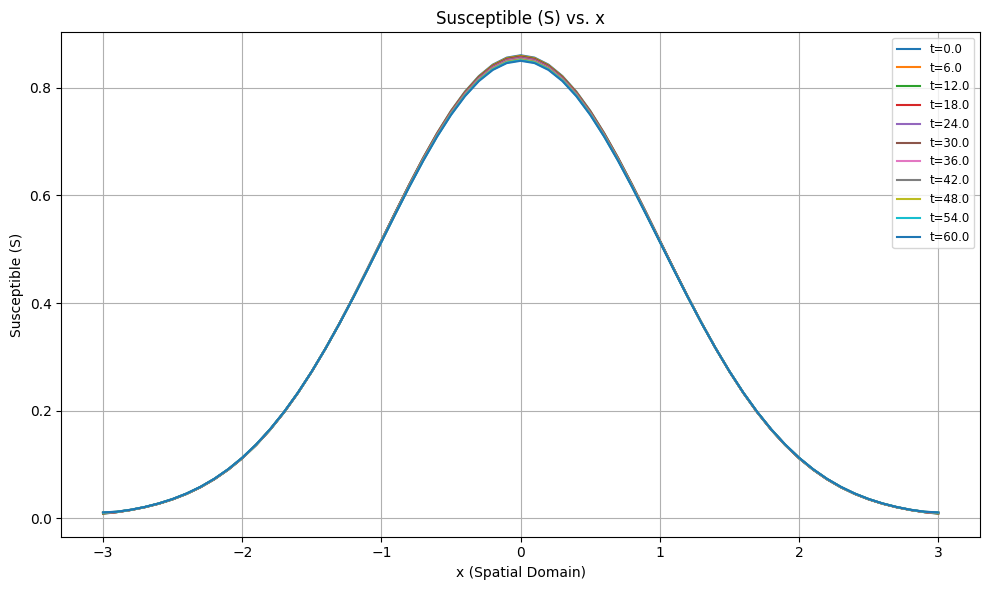

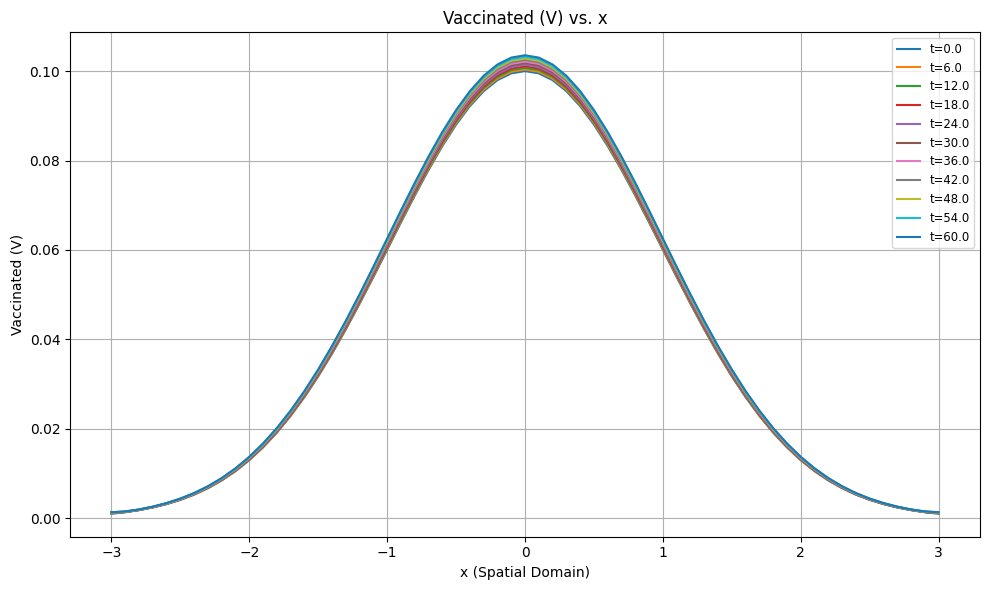

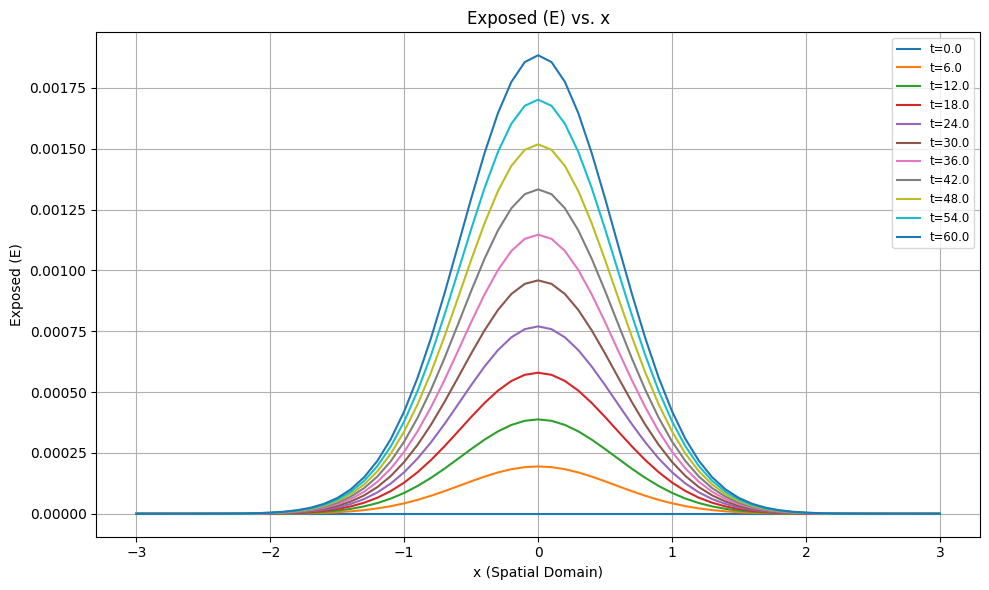

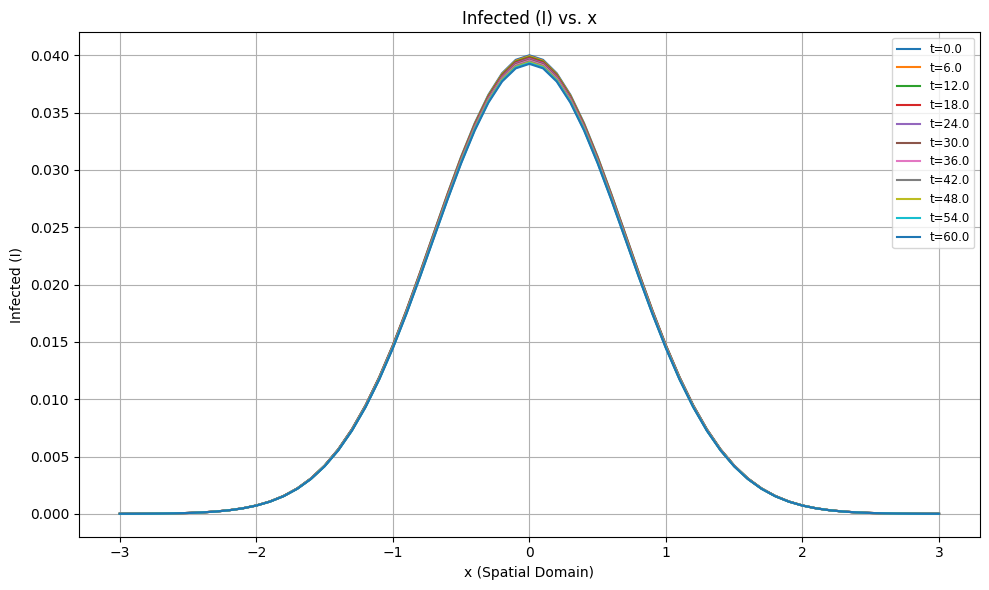

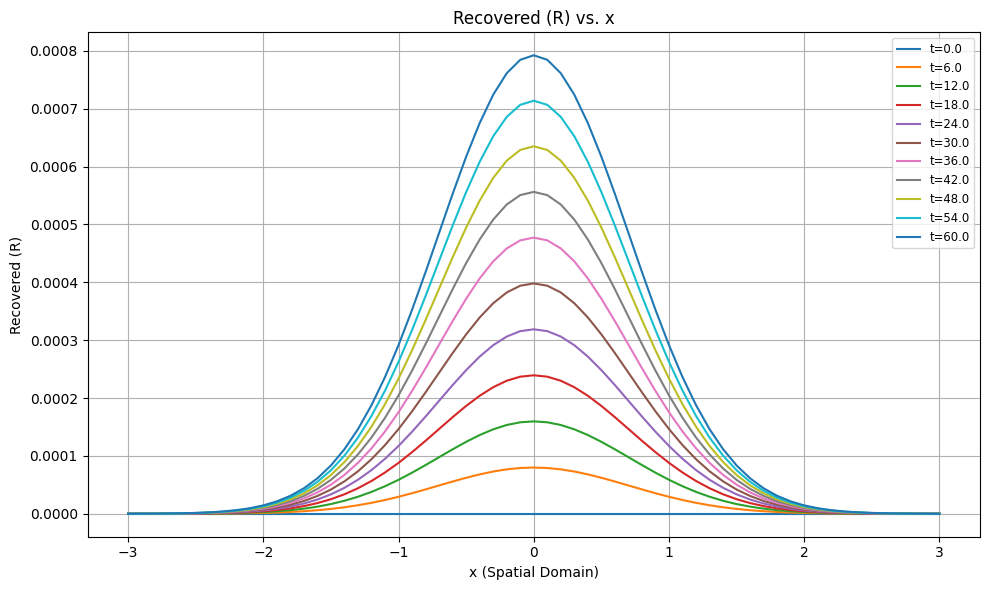

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. SPATIAL DERIVATIVE FUNCTIONS (Finite Difference Approximations)

def dss004(xl, xu, n, u):
    """5-point, 4th-order approximation for the first derivative."""
    dx = (xu - xl) / (n - 1)
    r4fdx = 1.0 / (12.0 * dx)
    nm2 = n - 2
    ux = np.zeros(n)
    ux[0] = r4fdx * (-25.0 * u[0] + 48.0 * u[1] - 36.0 * u[2] + 16.0 * u[3] - 3.0 * u[4])
    ux[1] = r4fdx * (-3.0 * u[0] - 10.0 * u[1] + 18.0 * u[2] - 6.0 * u[3] + 1.0 * u[4])
    for i in range(2, nm2):
        ux[i] = r4fdx * (1.0 * u[i-2] - 8.0 * u[i-1] + 0.0 * u[i] + 8.0 * u[i+1] - 1.0 * u[i+2])
    ux[n-2] = r4fdx * (-1.0 * u[n-5] + 6.0 * u[n-4] - 18.0 * u[n-3] + 10.0 * u[n-2] + 3.0 * u[n-1])
    ux[n-1] = r4fdx * (3.0 * u[n-5] - 16.0 * u[n-4] + 36.0 * u[n-3] - 48.0 * u[n-2] + 25.0 * u[n-1])
    return ux

def dss044(xl, xu, n, u, ux, nl, nu):
    """4th-order approximation for the second derivative."""
    dx = (xu - xl) / (n - 1)
    r12dxs = 1.0 / (12.0 * dx**2)
    uxx = np.zeros(n)
    if nl == 1:
        uxx[0] = r12dxs * (45.0 * u[0] - 154.0 * u[1] + 214.0 * u[2] - 156.0 * u[3] + 61.0 * u[4] - 10.0 * u[5])
    elif nl == 2:
        uxx[0] = r12dxs * ((-415.0 / 6.0) * u[0] + 96.0 * u[1] - 36.0 * u[2] + (32.0 / 3.0) * u[3] - (3.0 / 2.0) * u[4] - 50.0 * ux[0] * dx)
    if nu == 1:
        uxx[n-1] = r12dxs * (45.0 * u[n-1] - 154.0 * u[n-2] + 214.0 * u[n-3] - 156.0 * u[n-4] + 61.0 * u[n-5] - 10.0 * u[n-6])
    elif nu == 2:
        uxx[n-1] = r12dxs * ((-415.0 / 6.0) * u[n-1] + 96.0 * u[n-2] - 36.0 * u[n-3] + (32.0 / 3.0) * u[n-4] - (3.0 / 2.0) * u[n-5] + 50.0 * ux[n-1] * dx)
    uxx[1] = r12dxs * (10.0 * u[0] - 15.0 * u[1] - 4.0 * u[2] + 14.0 * u[3] - 6.0 * u[4] + 1.0 * u[5])
    uxx[n-2] = r12dxs * (10.0 * u[n-1] - 15.0 * u[n-2] - 4.0 * u[n-3] + 14.0 * u[n-4] - 6.0 * u[n-5] + 1.0 * u[n-6])
    for i in range(2, n - 2):
        uxx[i] = r12dxs * (-1.0 * u[i - 2] + 16.0 * u[i - 1] - 30.0 * u[i] + 16.0 * u[i + 1] - 1.0 * u[i + 2])
    return uxx


# 2. THE PDE SYSTEM FUNCTION (Adapt based on your "kitab alwagib")

def flu_1(t, u, parms):
    """
    Computes the time derivatives of S, V, E, I, R.
    Adapt this based on the *exact* equations from your textbook.
    """
    beta, betae, betai, betav = parms["beta"], parms["betae"], parms["betai"], parms["betav"]
    alpha, phi, delta, theta, kappa = parms["alpha"], parms["phi"], parms["delta"], parms["theta"], parms["kappa"]
    sigma, gamma, r, d1, d2, d3, d4, d5 = parms["sigma"], parms["gamma"], parms["r"], parms["d1"], parms["d2"], parms["d3"], parms["d4"], parms["d5"]

    nx = len(u) // 5  # Number of spatial points
    S, V, E, I, R = np.split(u, 5)

    xl, xu = -3, 3  # Spatial domain boundaries (adjust if needed)
    nl, nu = 2, 2  # Neumann boundary conditions (adjust if needed)

    Sx = dss004(xl, xu, nx, S)
    Vx = dss004(xl, xu, nx, V)
    Ex = dss004(xl, xu, nx, E)
    Ix = dss004(xl, xu, nx, I)
    Rx = dss004(xl, xu, nx, R)

    # Apply Neumann boundary conditions (zero gradient)
    Sx[0], Sx[nx-1] = 0, 0
    Vx[0], Vx[nx-1] = 0, 0
    Ex[0], Ex[nx-1] = 0, 0
    Ix[0], Ix[nx-1] = 0, 0
    Rx[0], Rx[nx-1] = 0, 0

    Sxx = dss044(xl, xu, nx, S, Sx, nl, nu)
    Vxx = dss044(xl, xu, nx, V, Vx, nl, nu)
    Exx = dss044(xl, xu, nx, E, Ex, nl, nu)
    Ixx = dss044(xl, xu, nx, I, Ix, nl, nu)
    Rxx = dss044(xl, xu, nx, R, Rx, nl, nu)

    St = np.zeros(nx)
    Vt = np.zeros(nx)
    Et = np.zeros(nx)
    It = np.zeros(nx)
    Rt = np.zeros(nx)

    for i in range(nx):
        ES = E[i] * S[i]
        IS = I[i] * S[i]
        EV = E[i] * V[i]
        IV = I[i] * V[i]
        IE = I[i] * E[i]
        IR = I[i] * R[i]

        #The line below had an extra indent, causing the error.
        St[i] = -beta * betae * ES - beta * betai * IS + alpha * IS - phi * S[i] - r * S[i] + delta * R[i] + theta * V[i] + r + d1 * Sxx[i]
        Vt[i] = -beta * betae * betav * EV - beta * betai * betav * IV + alpha * IV - r * V[i] - theta * V[i] + phi * S[i] + d2 * Vxx[i]
        Et[i] = beta * betae * ES + beta * betai * IS + beta * betae * betav * EV + beta * betai * betav * IV + alpha * IE - (r + kappa +    sigma) * E[i] + d3 * Exx[i]
        It[i] = sigma * E[i] - (r + alpha + gamma) * I[i] + alpha * I[i]**2 + d4 * Ixx[i]  # Corrected I**2 term
        Rt[i] = kappa * E[i] + gamma * I[i] - r * R[i] - delta * R[i] + alpha * IR + d5 * Rxx[i]

    return np.concatenate([St, Vt, Et, It, Rt])
# --- 3. PARAMETERS AND INITIAL CONDITIONS ---
beta, betae, betai, betav = 0.5140, 0.250, 1.0, 0.9
sigma, gamma, delta = 1.0 / 2.0, 1.0 / 5.0, 1.0 / 365.0
mu, r, kappa, alpha = 5.50e-08, 1.140e-05, 1.857e-04, 9.30e-06
theta, phi = 1.0 / 365.0, 1 / 20
d1, d2, d3, d4, d5 = 0.05, 0.05, 0.025, 0.001, 0.0

nx = 61
xl, xu = -3, 3
xg = np.linspace(xl, xu, nx)
u0 = np.zeros(5 * nx)
for ix in range(nx):
    u0[ix] = 0.86 * np.exp(-(xg[ix] / 1.4)**2)
    u0[ix + nx] = 0.10 * np.exp(-(xg[ix] / 1.4)**2)
    u0[ix + 2 * nx] = 0
    u0[ix + 3 * nx] = 0.04 * np.exp(-xg[ix]**2)
    u0[ix + 4 * nx] = 0

nout, t0, tf = 11, 0, 60
tout = np.linspace(t0, tf, nout)

params = {
    "beta": beta, "betae": betae, "betai": betai, "betav": betav,
    "sigma": sigma, "gamma": gamma, "delta": delta, "mu": mu,
    "r": r, "kappa": kappa, "alpha": alpha, "theta": theta,
    "phi": phi, "d1": d1, "d2": d2, "d3": d3, "d4": d4, "d5": d5
}

# --- 4. RK4 IMPLEMENTATION ---
def rk4_step(t, u, dt, func, params):
    k1 = dt * func(t, u, params)
    k2 = dt * func(t + dt / 2, u + k1 / 2, params)
    k3 = dt * func(t + dt / 2, u + k2 / 2, params)
    k4 = dt * func(t + dt, u + k3, params)
    return u + (k1 + 2 * k2 + 2 * k3 + k4) / 6
start = time.time()

# Time stepping loop with RK4
t = t0
u = u0.copy()
out = [u]
t_values = [t]
dt = 0.01  # *** Adjust this time step as needed ***

while t < tf:
    u = rk4_step(t, u, dt, flu_1, params)
    t += dt
    out.append(u)
    t_values.append(t)

out = np.array(out)
t_values = np.array(t_values)
end = time.time()

print("RK4 AVG Time = ", (end - start))

# --- 5. DATA EXTRACTION AND PLOTTING (Complete) ---
S_xplot = np.zeros((nx, nout))
V_xplot = np.zeros((nx, nout))
E_xplot = np.zeros((nx, nout))
I_xplot = np.zeros((nx, nout))
R_xplot = np.zeros((nx, nout))

for it in range(nout):
    for ix in range(nx):
        S_xplot[ix, it] = out[it, ix]
        V_xplot[ix, it] = out[it, ix + nx]
        E_xplot[ix, it] = out[it, ix + 2*nx]
        I_xplot[ix, it] = out[it, ix + 3*nx]
        R_xplot[ix, it] = out[it, ix + 4*nx]


# Plotting (Complete and more robust)
def plot_results(xg, S_xplot, V_xplot, E_xplot, I_xplot, R_xplot, tout):
    """Plots the results for S, V, E, I, R."""
    compartments = ['Susceptible (S)', 'Vaccinated (V)', 'Exposed (E)', 'Infected (I)', 'Recovered (R)']
    data = [S_xplot, V_xplot, E_xplot, I_xplot, R_xplot]

    if len(tout) <= 20:  # Plot all time points if manageable
        time_indices = range(len(tout))
    else:  # Plot a subset of time points for clarity
        time_indices = [0, len(tout)//4, len(tout)//2, 3*len(tout)//4, -1]  # Evenly spaced + last point

    for i, (plot_data, title) in enumerate(zip(data, compartments)):
        plt.figure(figsize=(10, 6))  # Adjust figure size as needed
        for it in time_indices:
            plt.plot(xg, plot_data[:, it], label=f't={tout[it]:.1f}')

        plt.xlabel('x (Spatial Domain)')
        plt.ylabel(title)
        plt.title(f'{title} vs. x')
        plt.legend(loc='best', fontsize='small')  # Improved legend placement
        plt.grid(True)
        plt.tight_layout()  # Adjust layout to prevent labels from overlapping
        plt.show()

# Call the plotting function
plot_results(xg, S_xplot, V_xplot, E_xplot, I_xplot, R_xplot, tout)